In [0]:
from google.colab import files
uploaded = files.upload()

Saving BHEL.NS_Train.csv to BHEL.NS_Train (1).csv


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
import io
dataset_train = pd.read_csv(io.BytesIO(uploaded['BHEL.NS_Train.csv']))

In [0]:
training_set = dataset_train.iloc[:,1:2].values

In [0]:
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,5/6/2019,68.349998,68.349998,65.650002,65.900002,62.874786,9020087
1,5/7/2019,66.099998,66.699997,63.349998,63.799999,60.871185,8647726
2,5/8/2019,63.900002,63.900002,61.549999,61.750000,58.915295,15303026
3,5/9/2019,61.799999,62.849998,61.549999,62.450001,59.583160,13936931
4,5/10/2019,62.700001,63.500000,61.849998,63.150002,60.251026,11398050


In [0]:
training_set.shape

(160, 1)

In [0]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [0]:
X_train = []
y_train = []

In [0]:
for i in range(60, len(training_set_scaled)):
  X_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1) )

In [0]:
# Building RNN

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [0]:
regressor = Sequential()

In [0]:
regressor.add(LSTM(units=50, return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [0]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [0]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [0]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [0]:
regressor.add(Dense(units=1))

In [0]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [0]:
regressor.fit(X_train, y_train, epochs=100, batch_size = 32)

Epoch 1/100
100/100 [==============================] - 2s 17ms/step - loss: 0.0624
Epoch 2/100
100/100 [==============================] - 1s 5ms/step - loss: 0.0256
Epoch 3/100
100/100 [==============================] - 1s 6ms/step - loss: 0.0201
Epoch 4/100
100/100 [==============================] - 1s 6ms/step - loss: 0.0210
Epoch 5/100
100/100 [==============================] - 1s 6ms/step - loss: 0.0182
Epoch 6/100
100/100 [==============================] - 1s 5ms/step - loss: 0.0179
Epoch 7/100
100/100 [==============================] - 1s 6ms/step - loss: 0.0180
Epoch 8/100
100/100 [==============================] - 1s 6ms/step - loss: 0.0177
Epoch 9/100
100/100 [==============================] - 1s 6ms/step - loss: 0.0173
Epoch 10/100
100/100 [==============================] - 1s 6ms/step - loss: 0.0188
Epoch 11/100
100/100 [==============================] - 1s 5ms/step - loss: 0.0191
Epoch 12/100
100/100 [==============================] - 1s 5ms/step - loss: 0.0164
Epoch 13/100

In [0]:
from google.colab import files
uploaded = files.upload()

Saving BHEL.NS_Test.csv to BHEL.NS_Test (1).csv


In [0]:
import io
dataset_test = pd.read_csv(io.BytesIO(uploaded['BHEL.NS_Test.csv']))

In [0]:
real_stock_price = dataset_test.iloc[:,1:2].values

In [0]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)

In [0]:
dataset_total

0     68.349998
1     66.099998
2     63.900002
3     61.799999
4     62.700001
        ...    
77    20.950001
78    20.750000
79    21.000000
80    21.299999
81    21.700001
Name: Open, Length: 242, dtype: float64

In [0]:
inputs = dataset_total[len(dataset_total) - len(dataset_test)-60 : ].values

In [0]:
inputs.shape

(142,)

In [0]:
inputs = inputs.reshape(-1,1)

In [0]:
inputs = sc.transform(inputs)

In [0]:
inputs.shape

(142,)

In [0]:
X_test = []

In [0]:
for i in range (60, 80):
  X_test.append(inputs[i-60:i,0])

IndexError: ignored

In [0]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [0]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

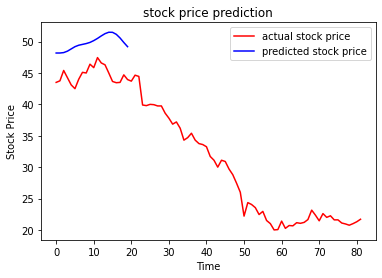

In [0]:
plt.plot(real_stock_price, color='red', label='actual stock price')
plt.plot(predicted_stock_price, color='blue', label='predicted stock price')
plt.title('stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()